# Pandas (list + for-loop + dict)

panel data (pandas) - provides data manipulation and analysis tools.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [2]:
np.__version__

'1.26.4'

In [3]:
pd.__version__

'2.1.4'

In [4]:
pd.set_option('display.max_columns',None)

In [5]:
for dirpath, dirnames, filenames in os.walk('./data'):
    print(f'{dirpath}-->{dirnames}-->{filenames}')

./data-->['.ipynb_checkpoints']-->['titanic.csv']
./data/.ipynb_checkpoints-->[]-->[]


# Series (1-D)

- column in a excel table
- Series is Part of DataFrame.
- Mutable
- Homogeneous

We can create Series from the folling types:

1. Fundamental
    - int,float,bool,complex
2. Sequence
       - str,bytes,bytearray,range
3. List
   - list,tuple
4. Dictonary
    - dict
4. Numpy ndarray
 - np.array()

The Following Types cannout be used to create a Series:
 - set, frozenset 

In [118]:
s1 = pd.Series(np.arange(12))
s1

0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
dtype: int64

In [65]:
s2 = pd.Series(['cat','bat','mat','rat'],index=['c','b','m','r'])
s2

c    cat
b    bat
m    mat
r    rat
dtype: object

In [75]:
s3 = pd.Series({'A':1,'B':2,'C':3})
s3

A    1
B    2
C    3
dtype: int64

## accessing elements

### s1

In [133]:
type(s1)

pandas.core.series.Series

In [134]:
len(s1)

13

In [135]:
sorted(s1)

[-1, -1, -1, -1, 0, 1, 2, 3, 5, 6, 7, 8, 9]

In [136]:
min(s1)

-1

In [138]:
max(s1)

9

In [119]:
s1.iloc[5]

5

In [120]:
s1[1]

1

In [121]:
s1[1:5]

1    1
2    2
3    3
4    4
dtype: int64

In [122]:
s1.iloc[1:5]

1    1
2    2
3    3
4    4
dtype: int64

In [123]:
s1.loc[1:5]

1    1
2    2
3    3
4    4
5    5
dtype: int64

In [124]:
s1[[1,5,1,2]] # SeriesObj[[indexes]] = value/[values]

1    1
5    5
1    1
2    2
dtype: int64

In [125]:
s1[2] = -99

In [126]:
s1

0      0
1      1
2    -99
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
dtype: int64

In [127]:
s1[35] = -100 #if the index doesn't exist new record created

In [128]:
s1

0       0
1       1
2     -99
3       3
4       4
5       5
6       6
7       7
8       8
9       9
10     10
11     11
35   -100
dtype: int64

In [129]:
s1[1:5] = -1

In [130]:
s1

0       0
1      -1
2      -1
3      -1
4      -1
5       5
6       6
7       7
8       8
9       9
10     10
11     11
35   -100
dtype: int64

In [131]:
s1[-1:-4:-1] = [1,2,3]

In [132]:
s1

0     0
1    -1
2    -1
3    -1
4    -1
5     5
6     6
7     7
8     8
9     9
10    3
11    2
35    1
dtype: int64

### s2

In [139]:
list(s2)

['cat', 'bat', 'mat', 'rat']

In [140]:
dict(s2)

{'c': 'cat', 'b': 'bat', 'm': 'mat', 'r': 'rat'}

In [89]:
s2[2]

/var/folders/4j/dgknx_s54nn4jt2zpy86mlr00000gn/T/ipykernel_8812/3318850340.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  s2[2]


'mat'

In [90]:
s2.loc[2]

KeyError: 2

In [91]:
s2.iloc[2]

'mat'

In [92]:
s2.loc['c']

'cat'

In [93]:
s2['c']

'cat'

### s3

In [105]:
s3.A

1

In [106]:
s3['A']

1

## playground

In [141]:
s1

0     0
1    -1
2    -1
3    -1
4    -1
5     5
6     6
7     7
8     8
9     9
10    3
11    2
35    1
dtype: int64

In [143]:
35 in s1 # membership operator ---> works on index by default

True

In [146]:
35 in s1.values # SeriesObj.values --> np.ndarray

False

In [149]:
for i in s1: # looping works on values by default (use .index)
    print(i,end=' ')

0 -1 -1 -1 -1 5 6 7 8 9 3 2 1 

In [150]:
s1.index

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 35], dtype='int64')

In [151]:
s2.index

Index(['c', 'b', 'm', 'r'], dtype='object')

In [154]:
s4 = pd.Series({'B':-2,'A':-1,'C':-3})
s4

B   -2
A   -1
C   -3
dtype: int64

In [155]:
s3

A    1
B    2
C    3
dtype: int64

In [162]:
s3+s4 # automatically detects same indexes 

A    0
B    0
C    0
dtype: int64

In [163]:
s5 = pd.Series({'C':-1,'D':-2,'A':-3})
s5

C   -1
D   -2
A   -3
dtype: int64

In [164]:
s3+s5

A   -2.0
B    NaN
C    2.0
D    NaN
dtype: float64

In [170]:
s6 = pd.Series(np.arange(5))
s6

0    0
1    1
2    2
3    3
4    4
dtype: int64

In [174]:
s7 = pd.Series(np.arange(-4,1)[::-1],index=[1,2,3,4,5])
s7

1    0
2   -1
3   -2
4   -3
5   -4
dtype: int64

In [176]:
s6-s7 # arithmetic operators broadcasting

0    NaN
1    1.0
2    3.0
3    5.0
4    7.0
5    NaN
dtype: float64

In [178]:
s8 = pd.Series(np.arange(12))

In [184]:
(s8>3) & (s8<9) # boolean Series

0     False
1     False
2     False
3     False
4      True
5      True
6      True
7      True
8      True
9     False
10    False
11    False
dtype: bool

In [186]:
s8.loc[(s8>3) & (s8<9)] # Boolean Indexing

4    4
5    5
6    6
7    7
8    8
dtype: int64

In [187]:
s1

0     0
1    -1
2    -1
3    -1
4    -1
5     5
6     6
7     7
8     8
9     9
10    3
11    2
35    1
dtype: int64

In [188]:
s1.shape

(13,)

In [190]:
s1.size #total irrespective of missing values

13

In [191]:
s1.dtype

dtype('int64')

In [194]:
s9 = pd.Series(np.arange(8),name='marks')

In [195]:
s9.name

'marks'

In [199]:
s9.is_unique # returns if all the elements are unique (True) or not (False)

True

## playground 2

In [267]:
s1.sample(3)

10    3
7     7
3    -1
dtype: int64

In [268]:
s1.value_counts()

-1    4
 0    1
 5    1
 6    1
 7    1
 8    1
 9    1
 3    1
 2    1
 1    1
Name: count, dtype: int64

In [269]:
sr1 = pd.Series([1,2,3,3,4,4,1,np.nan,np.nan])

In [270]:
sr1.value_counts(ascending=True,dropna=False,normalize=True)

2.0    0.111111
1.0    0.222222
3.0    0.222222
4.0    0.222222
NaN    0.222222
Name: proportion, dtype: float64

In [271]:
sr1

0    1.0
1    2.0
2    3.0
3    3.0
4    4.0
5    4.0
6    1.0
7    NaN
8    NaN
dtype: float64

In [272]:
sr1.sort_values(ascending=True,na_position='first')

7    NaN
8    NaN
0    1.0
6    1.0
1    2.0
2    3.0
3    3.0
4    4.0
5    4.0
dtype: float64

In [273]:
sr1.sort_index(ascending=False)

8    NaN
7    NaN
6    1.0
5    4.0
4    4.0
3    3.0
2    3.0
1    2.0
0    1.0
dtype: float64

In [274]:
sr1.count() # counts only non missing values

7

In [275]:
sr2 = pd.Series(np.arange(12))

In [276]:
sr2.between(3,8)

0     False
1     False
2     False
3      True
4      True
5      True
6      True
7      True
8      True
9     False
10    False
11    False
dtype: bool

In [277]:
sr2.clip()

0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
dtype: int64

In [278]:
sr1.duplicated() # takes into account null values also ---> 

0    False
1    False
2    False
3     True
4    False
5     True
6     True
7    False
8     True
dtype: bool

In [279]:
sr1.drop_duplicates(keep='first')

0    1.0
1    2.0
2    3.0
4    4.0
7    NaN
dtype: float64

In [280]:
sr1.dropna()

0    1.0
1    2.0
2    3.0
3    3.0
4    4.0
5    4.0
6    1.0
dtype: float64

In [281]:
sr1.hasnans

True

In [282]:
sr1

0    1.0
1    2.0
2    3.0
3    3.0
4    4.0
5    4.0
6    1.0
7    NaN
8    NaN
dtype: float64

In [283]:
sr1.ffill()

0    1.0
1    2.0
2    3.0
3    3.0
4    4.0
5    4.0
6    1.0
7    1.0
8    1.0
dtype: float64

In [284]:
sr1[9] = -99

In [285]:
sr1

0     1.0
1     2.0
2     3.0
3     3.0
4     4.0
5     4.0
6     1.0
7     NaN
8     NaN
9   -99.0
dtype: float64

In [286]:
sr1.bfill()

0     1.0
1     2.0
2     3.0
3     3.0
4     4.0
5     4.0
6     1.0
7   -99.0
8   -99.0
9   -99.0
dtype: float64

In [288]:
sr1

0     1.0
1     2.0
2     3.0
3     3.0
4     4.0
5     4.0
6     1.0
7     NaN
8     NaN
9   -99.0
dtype: float64

In [289]:
sr1.isin([5,4,22,-99])

0    False
1    False
2    False
3    False
4     True
5     True
6    False
7    False
8    False
9     True
dtype: bool

In [291]:
sr1.reset_index() # converts Series into DataFrame

,index,0
0,0,1.0
1,1,2.0
2,2,3.0
3,3,3.0
4,4,4.0
5,5,4.0
6,6,1.0
7,7,NaN
8,8,NaN
9,9,-99.0


In [295]:
sr1.drop(labels = [7,8,9]) # can specify index instead

0    1.0
1    2.0
2    3.0
3    3.0
4    4.0
5    4.0
6    1.0
dtype: float64

In [297]:
sr3 = pd.Series({'A':1,'B':2,'C':3})

In [303]:
s3.drop(labels='A') # index wont work here

B    2
C    3
dtype: int64

In [309]:
sr4 = pd.concat((sr2,sr3),axis=0)

In [310]:
sr4

0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
A      1
B      2
C      3
dtype: int64

In [317]:
sr4 = pd.concat((sr2,sr3),axis=1) # if indexes dont match it will result in NaN

In [318]:
sr4

,0,1
0,0.0,NaN
1,1.0,NaN
2,2.0,NaN
3,3.0,NaN
4,4.0,NaN
5,5.0,NaN
6,6.0,NaN
7,7.0,NaN
8,8.0,NaN
9,9.0,NaN


by default we get views of our data, any modifications on these views are reflected on the original data also. Use SeriesObj.copy()

In [324]:
sr1.tolist()

[1.0, 2.0, 3.0, 3.0, 4.0, 4.0, 1.0, nan, nan, -99.0]

Shifting - the shift() function in Pandas is used to, shift the entire series up or down by the desired number of periods

In [331]:
sr1.shift(periods=3,fill_value='-') # periods can be negative also

0      -
1      -
2      -
3    1.0
4    2.0
5    3.0
6    3.0
7    4.0
8    4.0
9    1.0
dtype: object

In [333]:
sr5 = pd.Series(np.arange(1,5))

In [334]:
sr5

0    1
1    2
2    3
3    4
dtype: int64

In [335]:
sr5**2

0     1
1     4
2     9
3    16
dtype: int64

In [336]:
def square(value):
    return value**2

In [340]:
sr5.apply(square) # doesn't modify original Series, first paramater is implicitilly taken, additional parmas to the func can be specified

0     1
1     4
2     9
3    16
dtype: int64

In [341]:
sr5

0    1
1    2
2    3
3    4
dtype: int64

In [351]:
sr5.rank(ascending=False) # highest element gets rank 1

0    4.0
1    3.0
2    2.0
3    1.0
dtype: float64

In [352]:
sr5.rank(ascending=True) # lowest element gets rank 1

0    1.0
1    2.0
2    3.0
3    4.0
dtype: float64

In [354]:
sr6 = pd.Series(np.array([1,1,1,1,5,6,7,2,2]))
sr6

0    1
1    1
2    1
3    1
4    5
5    6
6    7
7    2
8    2
dtype: int64

In [362]:
rank_functionality = pd.concat((sr6,pd.Series([1,2,3,4,7,8,9,5,6]),sr6.rank(method='average')),axis=1)

In [363]:
rank_functionality.rename(columns={0:'values',1:'rank',2:'rank_method'})

,values,rank,rank_method
0,1,1,2.5
1,1,2,2.5
2,1,3,2.5
3,1,4,2.5
4,5,7,7.0
5,6,8,8.0
6,7,9,9.0
7,2,5,5.5
8,2,6,5.5


In [365]:
sr7 = pd.Series(['cat','bat',np.nan])

In [366]:
sr7

0    cat
1    bat
2    NaN
dtype: object

In [372]:
sr7.map({'cat':'c','bat':'b','rat':'r'})

0      c
1      b
2    NaN
dtype: object

In [373]:
sr7.map('I am a {}'.format,na_action='ignore')

0    I am a cat
1    I am a bat
2           NaN
dtype: object

In [375]:
def mark(value):
    return value+'!'

In [378]:
sr7.map(mark,na_action='ignore')

0    cat!
1    bat!
2     NaN
dtype: object

In [379]:
sr8 = pd.Series([10,20,25,30])

In [380]:
sr8

0    10
1    20
2    25
3    30
dtype: int64

In [381]:
sr8.diff()

0     NaN
1    10.0
2     5.0
3     5.0
dtype: float64

In [383]:
sr8.pct_change() # (20-10)/10 (25-20)/20 (30-25)/25 (next_val-current_val)/(current_val)

0     NaN
1    1.00
2    0.25
3    0.20
dtype: float64

## additional methods

 - .head()/.tail()
 - .sum()/.product()
 - .mean()/.median()/.mode()
 - .std(ddof=)/.var(ddof=)	
 - .min()/.max()
 - .describe()
 - .info()
 - .astype()
 - .clip()
 - .isnull() 
 - .notnull()
 - .hasnans
 - .fillna()	

# DataFrame (2-D)

- An excel table with rown and columns

## miscellaneous

In [132]:
# dfObj.flags

In [134]:
# dfObj1 = dfObj2.set_flags(copy=True,allows_duplicate_labels=False)

- df.head()
- df.tail()
- df.shape
- df.size
- df.dtypes
- df.info()

## playground

In [175]:
df1 = pd.DataFrame([1,2,3,4,5])
df1

,0
0,1
1,2
2,3
3,4
4,5


In [176]:
df2 = pd.DataFrame([[1,2,3],[4,5,6]])
df2

,0,1,2
0,1,2,3
1,4,5,6


In [177]:
df3 = pd.DataFrame({'col1':[1,2,3],'col2':[4,5,6]})
df3

,col1,col2
0,1,4
1,2,5
2,3,6


In [178]:
df2

,0,1,2
0,1,2,3
1,4,5,6


In [179]:
df2.index

RangeIndex(start=0, stop=2, step=1)

In [181]:
df2.keys()

RangeIndex(start=0, stop=3, step=1)

In [182]:
df2.columns

RangeIndex(start=0, stop=3, step=1)

In [183]:
df2.columns = ['A','B','C']

In [184]:
df2

,A,B,C
0,1,2,3
1,4,5,6


In [185]:
df2 = df2.rename(columns={'A':'col1','B':'col2','C':'col3'},index={0:'row1',1:'row2'}) # errors = 'raise'

In [186]:
df2

,col1,col2,col3
row1,1,2,3
row2,4,5,6


In [2]:
flights = sns.load_dataset('flights')

In [239]:
flights.columns

Index(['year', 'month', 'passengers'], dtype='object')

In [240]:
flights = flights.set_index(['year', 'month'])

In [241]:
flights.reset_index()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [3]:
tips = sns.load_dataset('tips')

In [139]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


Shuffle the rows of the DataFrame using the sample() method with the parameter<br>
frac as 1, it determines what fraction of total instances need to be returned.<br>
Print the original and the shuffled DataFrames.

In [246]:
tips.sample()

,total_bill,tip,sex,smoker,day,time,size
127,14.52,2.0,Female,No,Thur,Lunch,2


In [247]:
tips.sample(5)

,total_bill,tip,sex,smoker,day,time,size
221,13.42,3.48,Female,Yes,Fri,Lunch,2
99,12.46,1.50,Male,No,Fri,Dinner,2
171,15.81,3.16,Male,Yes,Sat,Dinner,2
8,15.04,1.96,Male,No,Sun,Dinner,2
0,16.99,1.01,Female,No,Sun,Dinner,2


In [255]:
tips.sample(5) # replace parameter

,total_bill,tip,sex,smoker,day,time,size
135,8.51,1.25,Female,No,Thur,Lunch,2
130,19.08,1.50,Male,No,Thur,Lunch,2
88,24.71,5.85,Male,No,Thur,Lunch,2
185,20.69,5.00,Male,No,Sun,Dinner,5
217,11.59,1.50,Male,Yes,Sat,Dinner,2


In [256]:
tips.sample(frac=0.5)

,total_bill,tip,sex,smoker,day,time,size
27,12.69,2.00,Male,No,Sat,Dinner,2
210,30.06,2.00,Male,Yes,Sat,Dinner,3
137,14.15,2.00,Female,No,Thur,Lunch,2
81,16.66,3.40,Male,No,Thur,Lunch,2
99,12.46,1.50,Male,No,Fri,Dinner,2
...,...,...,...,...,...,...,...
69,15.01,2.09,Male,Yes,Sat,Dinner,2
41,17.46,2.54,Male,No,Sun,Dinner,2
156,48.17,5.00,Male,No,Sun,Dinner,6
181,23.33,5.65,Male,Yes,Sun,Dinner,2


In [267]:
tips['day'].unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [271]:
tips['size'].nunique() # dropna : bool, default True Don't include NaN in the counts.

6

In [301]:
tips.memory_usage()

Index          132
total_bill    1952
tip           1952
sex            368
smoker         368
day            448
time           368
size          1952
dtype: int64

In [4]:
titanic = pd.read_csv('./data/titanic.csv')

In [5]:
titanic = titanic.set_index('PassengerId')

In [286]:
np.setdiff1d(titanic.index.values,titanic.index.values)

array([], dtype=int64)

In [287]:
titanic.sample(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
573,1,1,"Flynn, Mr. John Irwin (""Irving"")",male,36.0,0,0,PC 17474,26.3875,E25,S
414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0000,NaN,S
872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
59,1,2,"West, Miss. Constance Mirium",female,5.0,1,2,C.A. 34651,27.7500,NaN,S
157,1,3,"Gilnagh, Miss. Katherine ""Katie""",female,16.0,0,0,35851,7.7333,NaN,Q


<Axes: ylabel='PassengerId'>

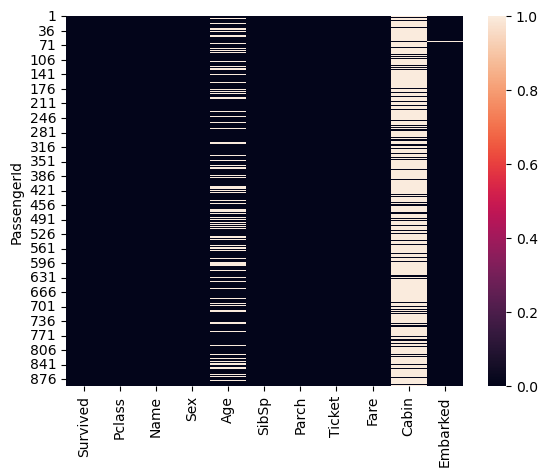

In [289]:
sns.heatmap(titanic.isnull())

In [292]:
titanic.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [294]:
titanic.notnull().sum()

Survived    891
Pclass      891
Name        891
Sex         891
Age         714
SibSp       891
Parch       891
Ticket      891
Fare        891
Cabin       204
Embarked    889
dtype: int64

In [295]:
titanic.shape[0]

891

In [296]:
titanic.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [297]:
temp_df = titanic[['Survived', 'Pclass', 'Name', 'Sex']].copy()

In [302]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [304]:
tips['size'] = tips['size'].astype('category') # can also pass a dict {'colName':dataType}

In [305]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    category
dtypes: category(5), float64(2)
memory usage: 5.9 KB


In [307]:
tips.describe() # only numerical columns

,total_bill,tip
count,244.000000,244.000000
mean,19.785943,2.998279
std,8.902412,1.383638
min,3.070000,1.000000
25%,13.347500,2.000000
50%,17.795000,2.900000
75%,24.127500,3.562500
max,50.810000,10.000000


In [313]:
tips.describe(include='category')

,sex,smoker,day,time,size
count,244,244,244,244,244
unique,2,2,4,2,6
top,Male,No,Sat,Dinner,2
freq,157,151,87,176,156


When understanding data, I might be a good idea to separate different types of data, which can be used later.
- e.g. df[continious].describe()/
- e.g. df.describe(include='object')

In [314]:
titanic.Cabin.size

891

In [315]:
titanic.Cabin.count()

204

In [316]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [329]:
titanic.sort_values(by='Age',ascending=False,na_position='first')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...
79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C


In [6]:
attention = sns.load_dataset('attention')

In [336]:
attention.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  60 non-null     int64  
 1   subject     60 non-null     int64  
 2   attention   60 non-null     object 
 3   solutions   60 non-null     int64  
 4   score       60 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 2.5+ KB


In [339]:
attention.sort_values(by=['score','solutions'],ascending=[False,True]).head()

,Unnamed: 0,subject,attention,solutions,score
31,31,12,focused,2,9.0
52,52,13,focused,3,9.0
11,11,12,focused,1,8.0
13,13,14,focused,1,8.0
14,14,15,focused,1,8.0


In [341]:
tips.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00


In [343]:
titanic.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<Axes: >

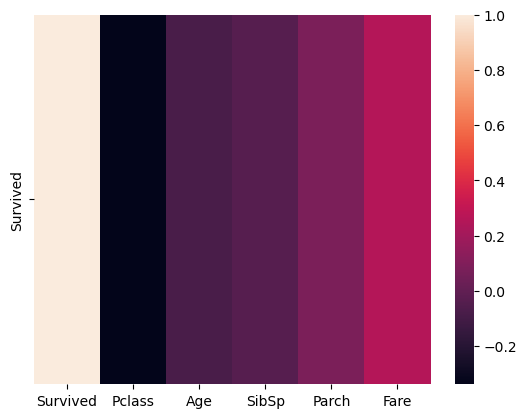

In [370]:
sns.heatmap(titanic[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch','Fare']].corr()[['Survived']].T)

In [372]:
titanic['Age'].skew()

0.38910778230082704

In [381]:
tips.apply(lambda row: f'{row.day}+{row.time}',axis=1) # axis='columns' sends each row instead of each col in the DataFrame

0       Sun+Dinner
1       Sun+Dinner
2       Sun+Dinner
3       Sun+Dinner
4       Sun+Dinner
          ...     
239     Sat+Dinner
240     Sat+Dinner
241     Sat+Dinner
242     Sat+Dinner
243    Thur+Dinner
Length: 244, dtype: object

In [385]:
tips[['total_bill','tip','size']].map(lambda x: x*10)

,total_bill,tip,size
0,169.9,10.1,20
1,103.4,16.6,30
2,210.1,35.0,30
3,236.8,33.1,20
4,245.9,36.1,40
...,...,...,...
239,290.3,59.2,30
240,271.8,20.0,20
241,226.7,20.0,20
242,178.2,17.5,20


In [423]:
df7 = pd.DataFrame({'A':[1,2,3],'C':[7,8,9]})

In [424]:
df7

,A,C
0,1,7
1,2,8
2,3,9


In [425]:
df7.insert(1,'B',[1,2,3])

In [426]:
df7

,A,B,C
0,1,1,7
1,2,2,8
2,3,3,9


- df.drop(single col or [cols],axis=1) axis='columns'
- df.drop(single row or [rows],axis=0) axis='rows'
- df.drop(columns = single col or [cols]) **better method**
- df.drop(index = single row or [rows]) **better method**

In [427]:
df7 = df7.drop(labels='A',axis='columns')

In [428]:
df7

,B,C
0,1,7
1,2,8
2,3,9


In [429]:
df7.sum(axis=1) # columns (across)

0     8
1    10
2    12
dtype: int64

In [430]:
df7.sum(axis=0) # rows (down)

B     6
C    24
dtype: int64

**df.dropna()**
- how='any' --> if any value in a row is missing
- how='all' --> if all values in a row are missing
- subset=[''] perform on the specified cols (or logic, i.e. if either of the cols have missing values the row is dropped )
- subset=[''] + how='all' perform on the specified cols (and logic, i.e. only drops if all cols specified have missing values)
- axis=1 to work on columns, tresh parameter, if missing values => this number the column is dropped<br>
**Try to retain as much as data as possible**

In [7]:
pets = pd.read_csv('https://raw.githubusercontent.com/kimfetti/Videos/master/Pandas_Tips/data/pet_data.csv')

In [475]:
pets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       491 non-null    object
 1   pet_type   490 non-null    object
 2   food_type  434 non-null    object
 3   amount     388 non-null    object
 4   brand      85 non-null     object
dtypes: object(5)
memory usage: 19.7+ KB


In [476]:
pets.sample(5)

,name,pet_type,food_type,amount,brand
403,Bella,Hamster,Seeds,41g,NaN
128,Luna,Turtle,Vegetables,NaN,NaN
494,NaN,Turtle,Pellets,162g,NaN
270,Coco,Cat,Wet Food,156g,NaN
400,Jasper,Lizard,Insects,213g,NaN


In [477]:
pets.duplicated().sum()

7

In [478]:
pets[pets.duplicated(keep='first')]

,name,pet_type,food_type,amount,brand
167,NaN,NaN,NaN,NaN,NaN
242,Cooper,Guinea Pig,Pellets,NaN,NaN
261,NaN,NaN,NaN,NaN,NaN
262,NaN,NaN,NaN,NaN,NaN
275,Rocky,Fish,Pellets,NaN,NaN
323,Stella,Snake,NaN,NaN,NaN
485,Luna,Cat,NaN,NaN,NaN


In [479]:
pets[pets.duplicated(keep='last')]

,name,pet_type,food_type,amount,brand
28,Cooper,Guinea Pig,Pellets,NaN,NaN
42,NaN,NaN,NaN,NaN,NaN
95,Luna,Cat,NaN,NaN,NaN
144,Rocky,Fish,Pellets,NaN,NaN
152,Stella,Snake,NaN,NaN,NaN
167,NaN,NaN,NaN,NaN,NaN
261,NaN,NaN,NaN,NaN,NaN


In [480]:
pets[pets.duplicated(keep=False)]

,name,pet_type,food_type,amount,brand
28,Cooper,Guinea Pig,Pellets,NaN,NaN
42,NaN,NaN,NaN,NaN,NaN
95,Luna,Cat,NaN,NaN,NaN
144,Rocky,Fish,Pellets,NaN,NaN
152,Stella,Snake,NaN,NaN,NaN
167,NaN,NaN,NaN,NaN,NaN
242,Cooper,Guinea Pig,Pellets,NaN,NaN
261,NaN,NaN,NaN,NaN,NaN
262,NaN,NaN,NaN,NaN,NaN
275,Rocky,Fish,Pellets,NaN,NaN


In [481]:
pets[pets.duplicated(subset=['name','pet_type'])]

,name,pet_type,food_type,amount,brand
23,Mittens,Dog,Wet Food,91g,TropicalFeast
26,Lily,Cat,Wet Food,NaN,NaN
37,Duke,Snake,NaN,53g,NaN
62,Tucker,Parrot,Seeds,209g,NaN
77,Chloe,Snake,Rodents,234g,NaN
...,...,...,...,...,...
495,Shadow,Dog,Wet Food,229g,TropicalFeast
496,Nala,Snake,Eggs,114g,NaN
497,Finn,Turtle,Pellets,NaN,NaN
498,Finn,Hamster,Seeds,55g,NaN


In [482]:
pets.shape

(500, 5)

In [487]:
pets.drop_duplicates() # exact match in all cols 
# also can use subset parameter
# keep param as available

,name,pet_type,food_type,amount,brand
0,Simba,Lizard,Insects,212g,NaN
1,Winston,Ferret,Dry Food,NaN,Pawsome
2,Bella,Parrot,Seeds,NaN,NaN
3,Shadow,Hamster,Pellets,58g,NaN
4,Milo,Rabbit,Vegetables,124g,NaN
...,...,...,...,...,...
495,Shadow,Dog,Wet Food,229g,TropicalFeast
496,Nala,Snake,Eggs,114g,NaN
497,Finn,Turtle,Pellets,NaN,NaN
498,Finn,Hamster,Seeds,55g,NaN


In [492]:
pets[['name','pet_type']].value_counts()

name     pet_type
Mocha    Fish        5
Lulu     Turtle      4
Charlie  Parrot      4
Stella   Snake       4
Harley   Ferret      4
                    ..
Mocha    Turtle      1
Molly    Bird        1
         Lizard      1
         Turtle      1
Zoe      Turtle      1
Name: count, Length: 319, dtype: int64

- data['NewCol'] = df['']-df['']
- df['NewCol'] = [.............] 
- df['NewCol'] = value ---> sets for all records

## playground 2

In [517]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [518]:
tips[0:4]

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2


In [519]:
tips['tip'][0:5:2]

0    1.01
2    3.50
4    3.61
Name: tip, dtype: float64

In [521]:
tips[['total_bill','tip','sex']][0:5:2]

,total_bill,tip,sex
0,16.99,1.01,Female
2,21.01,3.50,Male
4,24.59,3.61,Female


In [516]:
for index,row in tips.iterrows():
    print(index)
    print(row)

0
total_bill     16.99
tip             1.01
sex           Female
smoker            No
day              Sun
time          Dinner
size               2
Name: 0, dtype: object
1
total_bill     10.34
tip             1.66
sex             Male
smoker            No
day              Sun
time          Dinner
size               3
Name: 1, dtype: object
2
total_bill     21.01
tip              3.5
sex             Male
smoker            No
day              Sun
time          Dinner
size               3
Name: 2, dtype: object
3
total_bill     23.68
tip             3.31
sex             Male
smoker            No
day              Sun
time          Dinner
size               2
Name: 3, dtype: object
4
total_bill     24.59
tip             3.61
sex           Female
smoker            No
day              Sun
time          Dinner
size               4
Name: 4, dtype: object
5
total_bill     25.29
tip             4.71
sex             Male
smoker            No
day              Sun
time          Dinner
size        

In [525]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [524]:
tips[0] #columns by defauls

KeyError: 0

In [526]:
tips.iloc[0]

total_bill     16.99
tip             1.01
sex           Female
smoker            No
day              Sun
time          Dinner
size               2
Name: 0, dtype: object

In [527]:
tips.iloc[-1]

total_bill     18.78
tip              3.0
sex           Female
smoker            No
day             Thur
time          Dinner
size               2
Name: 243, dtype: object

In [529]:
tips.loc[243]

total_bill     18.78
tip              3.0
sex           Female
smoker            No
day             Thur
time          Dinner
size               2
Name: 243, dtype: object

- .iloc[rows,cols] --> +ve -ve <br>
     [single value or list of value or slicing, single value or list of value or slicing] <br>


- .iloc[index] ----> row <br>


- .loc[row,col]<br>
	[single value or list of value or slicing, single value or list of value or slicing] --> NOTE: with loc -1 in slicing not applicable; slice with names<br>

- .loc[index] ---> row
-  if we provide boolean indexing df[[boolean index]] --> works on rows
- df['col'][condition]
- data[data['col']==value]

In [532]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [538]:
tips.loc[lambda x: x.day=='Sun']

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
186,20.90,3.50,Female,Yes,Sun,Dinner,3
187,30.46,2.00,Male,Yes,Sun,Dinner,5
188,18.15,3.50,Female,Yes,Sun,Dinner,3
189,23.10,4.00,Male,Yes,Sun,Dinner,3


- use () for multiple conditions ~ | &

In [544]:
mask = tips['total_bill'] > 40

In [545]:
tips[mask]

,total_bill,tip,sex,smoker,day,time,size
59,48.27,6.73,Male,No,Sat,Dinner,4
95,40.17,4.73,Male,Yes,Fri,Dinner,4
102,44.30,2.50,Female,Yes,Sat,Dinner,3
142,41.19,5.00,Male,No,Thur,Lunch,5
156,48.17,5.00,Male,No,Sun,Dinner,6
170,50.81,10.00,Male,Yes,Sat,Dinner,3
182,45.35,3.50,Male,Yes,Sun,Dinner,3
184,40.55,3.00,Male,Yes,Sun,Dinner,2
197,43.11,5.00,Female,Yes,Thur,Lunch,4
212,48.33,9.00,Male,No,Sat,Dinner,4


In [547]:
tips.iloc[mask.values]

,total_bill,tip,sex,smoker,day,time,size
59,48.27,6.73,Male,No,Sat,Dinner,4
95,40.17,4.73,Male,Yes,Fri,Dinner,4
102,44.30,2.50,Female,Yes,Sat,Dinner,3
142,41.19,5.00,Male,No,Thur,Lunch,5
156,48.17,5.00,Male,No,Sun,Dinner,6
170,50.81,10.00,Male,Yes,Sat,Dinner,3
182,45.35,3.50,Male,Yes,Sun,Dinner,3
184,40.55,3.00,Male,Yes,Sun,Dinner,2
197,43.11,5.00,Female,Yes,Thur,Lunch,4
212,48.33,9.00,Male,No,Sat,Dinner,4


In [548]:
tips.loc[mask]

,total_bill,tip,sex,smoker,day,time,size
59,48.27,6.73,Male,No,Sat,Dinner,4
95,40.17,4.73,Male,Yes,Fri,Dinner,4
102,44.30,2.50,Female,Yes,Sat,Dinner,3
142,41.19,5.00,Male,No,Thur,Lunch,5
156,48.17,5.00,Male,No,Sun,Dinner,6
170,50.81,10.00,Male,Yes,Sat,Dinner,3
182,45.35,3.50,Male,Yes,Sun,Dinner,3
184,40.55,3.00,Male,Yes,Sun,Dinner,2
197,43.11,5.00,Female,Yes,Thur,Lunch,4
212,48.33,9.00,Male,No,Sat,Dinner,4


In [550]:
tips.loc[0:5,[True,False,True,True,False,False,False]]

,total_bill,sex,smoker
0,16.99,Female,No
1,10.34,Male,No
2,21.01,Male,No
3,23.68,Male,No
4,24.59,Female,No
5,25.29,Male,No


In [553]:
tips.loc[mask,'total_bill':'smoker']

,total_bill,tip,sex,smoker
59,48.27,6.73,Male,No
95,40.17,4.73,Male,Yes
102,44.30,2.50,Female,Yes
142,41.19,5.00,Male,No
156,48.17,5.00,Male,No
170,50.81,10.00,Male,Yes
182,45.35,3.50,Male,Yes
184,40.55,3.00,Male,Yes
197,43.11,5.00,Female,Yes
212,48.33,9.00,Male,No


In [557]:
tips.loc[0,'total_bill'] = -99

In [558]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,-99.00,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [560]:
tips.at[0,'total_bill'] 

-99.0

In [561]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,-99.00,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [562]:
tips.replace(to_replace=['Male','Female'],value=['M','F'])

,total_bill,tip,sex,smoker,day,time,size
0,-99.00,1.01,F,No,Sun,Dinner,2
1,10.34,1.66,M,No,Sun,Dinner,3
2,21.01,3.50,M,No,Sun,Dinner,3
3,23.68,3.31,M,No,Sun,Dinner,2
4,24.59,3.61,F,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,M,No,Sat,Dinner,3
240,27.18,2.00,F,Yes,Sat,Dinner,2
241,22.67,2.00,M,Yes,Sat,Dinner,2
242,17.82,1.75,M,No,Sat,Dinner,2


In [563]:
tips.replace({'Male':'boy','Female':'girl'})

,total_bill,tip,sex,smoker,day,time,size
0,-99.00,1.01,girl,No,Sun,Dinner,2
1,10.34,1.66,boy,No,Sun,Dinner,3
2,21.01,3.50,boy,No,Sun,Dinner,3
3,23.68,3.31,boy,No,Sun,Dinner,2
4,24.59,3.61,girl,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,boy,No,Sat,Dinner,3
240,27.18,2.00,girl,Yes,Sat,Dinner,2
241,22.67,2.00,boy,Yes,Sat,Dinner,2
242,17.82,1.75,boy,No,Sat,Dinner,2


## playground 3

In [566]:
tips['total_bill'][0] = 18.63

/var/folders/4j/dgknx_s54nn4jt2zpy86mlr00000gn/T/ipykernel_16976/1425532463.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tips['total_bill'][0] = 18.63


In [567]:
tips.loc[0,'total_bill'] = 18.63

In [568]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,18.63,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [571]:
mask = tips.tip > 7

In [572]:
tips[mask]

,total_bill,tip,sex,smoker,day,time,size
23,39.42,7.58,Male,No,Sat,Dinner,4
170,50.81,10.00,Male,Yes,Sat,Dinner,3
212,48.33,9.00,Male,No,Sat,Dinner,4


In [575]:
tips.query('tip > 7')

,total_bill,tip,sex,smoker,day,time,size
23,39.42,7.58,Male,No,Sat,Dinner,4
170,50.81,10.00,Male,Yes,Sat,Dinner,3
212,48.33,9.00,Male,No,Sat,Dinner,4


In [581]:
average_tip = tips.tip.mean()

In [582]:
average_tip

2.99827868852459

In [584]:
tips.query('tip > @average_tip')

,total_bill,tip,sex,smoker,day,time,size
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
7,26.88,3.12,Male,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
232,11.61,3.39,Male,No,Sat,Dinner,2
234,15.53,3.00,Male,Yes,Sat,Dinner,2
238,35.83,4.67,Female,No,Sat,Dinner,3
239,29.03,5.92,Male,No,Sat,Dinner,3


In [587]:
tips[(tips.total_bill > 40) & (tips.tip > 5)]

,total_bill,tip,sex,smoker,day,time,size
59,48.27,6.73,Male,No,Sat,Dinner,4
170,50.81,10.00,Male,Yes,Sat,Dinner,3
212,48.33,9.00,Male,No,Sat,Dinner,4


In [588]:
tips.query('total_bill > 40 & tip > 5')

,total_bill,tip,sex,smoker,day,time,size
59,48.27,6.73,Male,No,Sat,Dinner,4
170,50.81,10.00,Male,Yes,Sat,Dinner,3
212,48.33,9.00,Male,No,Sat,Dinner,4


In [18]:
sr = np.array([True,False,True,True])

In [19]:
np.where(sr)

(array([0, 2, 3]),)

In [20]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [26]:
tips.index[tips.total_bill>50]

Index([170], dtype='int64')

In [28]:
tips.query('total_bill > 50')

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.0,Male,Yes,Sat,Dinner,3


In [32]:
tips['total_bill'].nlargest(10)

170    50.81
212    48.33
59     48.27
156    48.17
182    45.35
102    44.30
197    43.11
142    41.19
184    40.55
95     40.17
Name: total_bill, dtype: float64

In [33]:
tips['total_bill'].nsmallest(10)

67     3.07
92     5.75
111    7.25
172    7.25
149    7.51
195    7.56
218    7.74
145    8.35
135    8.51
126    8.52
Name: total_bill, dtype: float64

In [38]:
tips.nlargest(10,'tip')

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.00,Male,Yes,Sat,Dinner,3
212,48.33,9.00,Male,No,Sat,Dinner,4
23,39.42,7.58,Male,No,Sat,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
141,34.30,6.70,Male,No,Thur,Lunch,6
183,23.17,6.50,Male,Yes,Sun,Dinner,4
214,28.17,6.50,Female,Yes,Sat,Dinner,3
47,32.40,6.00,Male,No,Sun,Dinner,4
239,29.03,5.92,Male,No,Sat,Dinner,3
88,24.71,5.85,Male,No,Thur,Lunch,2


## playground 4

In [39]:
data1 = {
    'A': [1, 2, 3],
    'B': [4, 5, 6]
}

df1 = pd.DataFrame(data1)
df1

,A,B
0,1,4
1,2,5
2,3,6


In [60]:
data2 = {
    'A': [7, 8, 9],
    'B': [10, 11, 12]
}

df2 = pd.DataFrame(data2)
df2

,A,B
0,7,10
1,8,11
2,9,12


In [50]:
pd.concat([df1,df2],axis=0,ignore_index=True) # came col names in both dfs

,A,B
0,1,4
1,2,5
2,3,6
3,7,10
4,8,11
5,9,12


In [53]:
pd.concat([df1,df2],axis=1)

,A,B,A,B
0,1,4,7,10
1,2,5,8,11
2,3,6,9,12


In [57]:
pd.concat([df1,df2],axis=0) # diff cols in both dfs

,A,B,C
0,1,4.0,NaN
1,2,5.0,NaN
2,3,6.0,NaN
0,7,NaN,10.0
1,8,NaN,11.0
2,9,NaN,12.0


In [58]:
pd.concat([df1,df2],axis=1)

,A,B,A,C
0,1,4,7,10
1,2,5,8,11
2,3,6,9,12


In [62]:
df3 = pd.concat([df1,df2],keys=['df1','df2'],axis=0)

In [63]:
df3

A   B
df1 0  1   4
    1  2   5
    2  3   6
df2 0  7  10
    1  8  11
    2  9  12

In [68]:
df3.at[('df1',2),'A']

3

In [76]:
df3.loc['df1']

,A,B
0,1,4
1,2,5
2,3,6


In [71]:
df3.iloc[0]

A    1
B    4
Name: (df1, 0), dtype: int64

In [77]:
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [84]:
titanic.groupby(by='Sex')

In [88]:
len(titanic.groupby(by='Sex')) # no. of groups

2

In [89]:
for group, dataframe in titanic.groupby(by='Sex'):
    print(group)
    print(dataframe)

female
             Survived  Pclass  \
PassengerId                     
2                   1       1   
3                   1       3   
4                   1       1   
9                   1       3   
10                  1       2   
...               ...     ...   
881                 1       2   
883                 0       3   
886                 0       3   
888                 1       1   
889                 0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
9            Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0   
10                         Nasser, Mrs. Nicholas (Adele Achem)  female  14.0   
...

In [90]:
gender_group = titanic.groupby(by='Sex')

In [93]:
gender_group.size() # no. of rows in each group

Sex
female    314
male      577
dtype: int64

In [94]:
titanic.Sex.value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [101]:
gender_group.first() # selects first row of each group

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,
female,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C
male,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,E46,S


In [102]:
gender_group.last()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,
female,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",19.0,1,2,W./C. 6607,23.45,B42,S
male,0,3,"Dooley, Mr. Patrick",32.0,0,0,370376,7.75,C148,Q


In [110]:
gender_group.nth(1) # 0 indexed -ve indexes also possible

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.050,NaN,S


In [112]:
gender_group.groups # dict, group and corresponding indexes from original df

{'female': [2, 3, 4, 9, 10, 11, 12, 15, 16, 19, 20, 23, 25, 26, 29, 32, 33, 39, 40, 41, 42, 44, 45, 48, 50, 53, 54, 57, 59, 62, 67, 69, 72, 80, 83, 85, 86, 89, 99, 101, 107, 110, 112, 114, 115, 120, 124, 129, 133, 134, 137, 141, 142, 143, 148, 152, 157, 162, 167, 168, 173, 178, 181, 185, 187, 191, 193, 195, 196, 199, 200, 206, 209, 212, 216, 217, 219, 230, 231, 234, 236, 238, 241, 242, 247, 248, 252, 255, 256, 257, 258, 259, 260, 265, 269, 270, 273, 275, 276, 277, ...], 'male': [1, 5, 6, 7, 8, 13, 14, 17, 18, 21, 22, 24, 27, 28, 30, 31, 34, 35, 36, 37, 38, 43, 46, 47, 49, 51, 52, 55, 56, 58, 60, 61, 63, 64, 65, 66, 68, 70, 71, 73, 74, 75, 76, 77, 78, 79, 81, 82, 84, 87, 88, 90, 91, 92, 93, 94, 95, 96, 97, 98, 100, 102, 103, 104, 105, 106, 108, 109, 111, 113, 116, 117, 118, 119, 121, 122, 123, 125, 126, 127, 128, 130, 131, 132, 135, 136, 138, 139, 140, 144, 145, 146, 147, 149, 150, 151, 153, 154, 155, 156, ...]}

In [116]:
gender_group.ngroups

2

In [121]:
gender_group.get_group('female') # gives us a specific group

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...
881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q


In [136]:
gender_group.describe() # for each group for each col in group describe

Survived                                              Pclass            \
          count      mean       std  min  25%  50%  75%  max  count      mean   
Sex                                                                             
female    314.0  0.742038  0.438211  0.0  0.0  1.0  1.0  1.0  314.0  2.159236   
male      577.0  0.188908  0.391775  0.0  0.0  0.0  0.0  1.0  577.0  2.389948   

                                            Age                              \
            std  min  25%  50%  75%  max  count       mean        std   min   
Sex                                                                           
female  0.85729  1.0  1.0  2.0  3.0  3.0  261.0  27.915709  14.110146  0.75   
male    0.81358  1.0  2.0  3.0  3.0  3.0  453.0  30.726645  14.678201  0.42   

                                SibSp                                          \
         25%   50%   75%   max  count      mean       std  min  25%  50%  75%   
Sex                                                                             
female  18.0  27.0  37.0  63.0  314.0  0.694268  1.156520  0.0  0.0  0.0  1.0   
male    21.0  29.0  39.0  80.0  577.0  0.429809  1.061811  0.0  0.0  0.0  0.0   

             Parch                                                Fare  \
        max  count      mean       std  min  25%  50%  75%  max  count   
Sex                                                                      
female  8.0  314.0  0.649682  1.022846  0.0  0.0  0.0  1.0  6.0  314.0   
male    8.0  577.0  0.235702  0.612294  0.0  0.0  0.0  0.0  5.0  577.0   

                                                                      
             mean        std   min        25%   50%    75%       max  
Sex                                                                   
female  44.479818  57.997698  6.75  12.071875  23.0  55.00  512.3292  
male    25.523893  43.138263  0.00   7.895800  10.5  26.55  512.3292

In [139]:
gender_group.describe(include='object').columns

MultiIndex([(    'Name',  'count'),
            (    'Name', 'unique'),
            (    'Name',    'top'),
            (    'Name',   'freq'),
            (  'Ticket',  'count'),
            (  'Ticket', 'unique'),
            (  'Ticket',    'top'),
            (  'Ticket',   'freq'),
            (   'Cabin',  'count'),
            (   'Cabin', 'unique'),
            (   'Cabin',    'top'),
            (   'Cabin',   'freq'),
            ('Embarked',  'count'),
            ('Embarked', 'unique'),
            ('Embarked',    'top'),
            ('Embarked',   'freq')],
           )

In [142]:
gender_group.sample(2) # from each group

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
817,0,3,"Heininen, Miss. Wendla Maria",female,23.0,0,0,STON/O2. 3101290,7.9250,NaN,S
54,1,2,"Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...",female,29.0,1,0,2926,26.0000,NaN,S
544,1,2,"Beane, Mr. Edward",male,32.0,1,0,2908,26.0000,NaN,S
687,0,3,"Panula, Mr. Jaako Arnold",male,14.0,4,1,3101295,39.6875,NaN,S


In [143]:
gender_group.nunique()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,
female,2,3,314,63,7,7,247,156,75,3
male,2,3,577,82,7,6,519,193,96,3


**can groupby on multiple cols df.groupby(by=['col1','col2']) --> groupbyObj.get_group(('col1','col2'))**

- .agg() --> pass a dict, key is col and value is function as str --> "<col>":'first' (To Retain Categorical Cols)<br>
					 --> pass in a list of func strs insted of a dict<br>
					 --> pass dict and have list as value

In [158]:
gender_group[['Age','Fare']].agg(['mean','min'])

Age             Fare      
             mean   min       mean   min
Sex                                     
female  27.915709  0.75  44.479818  6.75
male    30.726645  0.42  25.523893  0.00

In [162]:
gender_group.agg({'Age':'mean','Fare':'max'})

,Age,Fare
Sex,,
female,27.915709,512.3292
male,30.726645,512.3292


In [175]:
quantile_lambda = lambda x: x.quantile(0.25)

In [180]:
gender_group.agg({'Age':['mean','min','max'],'Fare':['std',('25%',quantile_lambda,)]})

Age                   Fare           
             mean   min   max        std        25%
Sex                                                
female  27.915709  0.75  63.0  57.997698  12.071875
male    30.726645  0.42  80.0  43.138263   7.895800

In [182]:
gender_group.agg({'Age':['mean','min','max'],'Fare':['std',('25%',lambda x: x.quantile(0.25))]})

Age                   Fare           
             mean   min   max        std        25%
Sex                                                
female  27.915709  0.75  63.0  57.997698  12.071875
male    30.726645  0.42  80.0  43.138263   7.895800

In [207]:
attention.groupby('attention').apply(min)

/var/folders/4j/dgknx_s54nn4jt2zpy86mlr00000gn/T/ipykernel_1289/747261883.py:1: FutureWarning: The provided callable <built-in function min> is currently using np.minimum.reduce. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string np.minimum.reduce instead.
  attention.groupby('attention').apply(min)


,Unnamed: 0,subject,attention,solutions,score
attention,,,,,
divided,0,1,divided,1,2.0
focused,10,11,focused,1,5.0


**split (groupby) (apply --> works on each group can provide custom functions ) combine ---> returns a df by combing the groups**

In [219]:
def foo(group):
    print(type(group))
    return group

In [221]:
gender_group.apply(foo)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


Survived  Pclass  \
Sex    PassengerId                     
female 2                   1       1   
       3                   1       3   
       4                   1       1   
       9                   1       3   
       10                  1       2   
...                      ...     ...   
male   884                 0       2   
       885                 0       3   
       887                 0       2   
       890                 1       1   
       891                 0       3   

                                                                 Name     Sex  \
Sex    PassengerId                                                              
female 2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female   
       3                                       Heikkinen, Miss. Laina  female   
       4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   
       9            Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female   
       10                         Nasser, Mrs. Nicholas (Adele Achem)  female   
...                                                               ...     ...   
male   884                              Banfield, Mr. Frederick James    male   
       885                                     Sutehall, Mr. Henry Jr    male   
       887                                      Montvila, Rev. Juozas    male   
       890                                      Behr, Mr. Karl Howell    male   
       891                                        Dooley, Mr. Patrick    male   

                     Age  SibSp  Parch            Ticket     Fare Cabin  \
Sex    PassengerId                                                        
female 2            38.0      1      0          PC 17599  71.2833   C85   
       3            26.0      0      0  STON/O2. 3101282   7.9250   NaN   
       4            35.0      1      0            113803  53.1000  C123   
       9            27.0      0      2            347742  11.1333   NaN   
       10           14.0      1      0            237736  30.0708   NaN   
...                  ...    ...    ...               ...      ...   ...   
male   884          28.0      0      0  C.A./SOTON 34068  10.5000   NaN   
       885          25.0      0      0   SOTON/OQ 392076   7.0500   NaN   
       887          27.0      0      0            211536  13.0000   NaN   
       890          26.0      0      0            111369  30.0000  C148   
       891          32.0      0      0            370376   7.7500   NaN   

                   Embarked  
Sex    PassengerId           
female 2                  C  
       3                  S  
       4                  S  
       9                  S  
       10                 C  
...                     ...  
male   884                S  
       885                S  
       887                S  
       890                C  
       891                Q  

[891 rows x 11 columns]

In [222]:
def func(group):
    return group.Name.str.startswith('C').sum()

In [223]:
gender_group.apply(func)

Sex
female    21
male      48
dtype: int64

In [224]:
def func1(group):
    group['Starts_With_C'] = group.Name.str.startswith('C').map({True:'YES',False:'NO'})
    return group

In [230]:
gender_group.apply(func1).query(' Starts_With_C == "YES" ' )

Survived  Pclass  \
Sex    PassengerId                     
female 2                   1       1   
       167                 1       1   
       209                 1       3   
       212                 1       2   
       238                 1       2   
...                      ...     ...   
male   757                 0       3   
       803                 1       1   
       839                 1       3   
       845                 0       3   
       873                 0       1   

                                                                 Name     Sex  \
Sex    PassengerId                                                              
female 2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female   
       167                     Chibnall, Mrs. (Edith Martha Bowerman)  female   
       209                                  Carr, Miss. Helen "Ellen"  female   
       212                                 Cameron, Miss. Clear Annie  female   
       238                           Collyer, Miss. Marjorie "Lottie"  female   
...                                                               ...     ...   
male   757                               Carlsson, Mr. August Sigfrid    male   
       803                        Carter, Master. William Thornton II    male   
       839                                            Chip, Mr. Chang    male   
       845                                        Culumovic, Mr. Jeso    male   
       873                                   Carlsson, Mr. Frans Olof    male   

                     Age  SibSp  Parch        Ticket      Fare        Cabin  \
Sex    PassengerId                                                            
female 2            38.0      1      0      PC 17599   71.2833          C85   
       167           NaN      0      1        113505   55.0000          E33   
       209          16.0      0      0        367231    7.7500          NaN   
       212          35.0      0      0  F.C.C. 13528   21.0000          NaN   
       238           8.0      0      2    C.A. 31921   26.2500          NaN   
...                  ...    ...    ...           ...       ...          ...   
male   757          28.0      0      0        350042    7.7958          NaN   
       803          11.0      1      2        113760  120.0000      B96 B98   
       839          32.0      0      0          1601   56.4958          NaN   
       845          17.0      0      0        315090    8.6625          NaN   
       873          33.0      0      0           695    5.0000  B51 B53 B55   

                   Embarked Starts_With_C  
Sex    PassengerId                         
female 2                  C           YES  
       167                S           YES  
       209                Q           YES  
       212                S           YES  
       238                S           YES  
...                     ...           ...  
male   757                S           YES  
       803                S           YES  
       839                S           YES  
       845                S           YES  
       873                S           YES  

[69 rows x 12 columns]

## playground 5

**MERGING**

- on --> common col ---> can be multiple columns use []
<br>
- how --> outer,inner,left,right

1. pd.merge(df1,df2,on = ' ', how = ' ')
2. DataFrame.merge(df2,on = ' ', how = ' ')<br>
                	left_on='' right_on=''  
3. suffixes --> param for merge dataframes containing same cols
4. validate --> param

### MultiIndex Series and DataFrames

- To fetch a single value if we require n peices of info, then it's n-D.
- With the help of multi-index we can represent a higher dimensional data in terms of lower dimension objects (series,dataFrame)

In [237]:
# can we have multiple index? Let's try
index_val = [('cse',2019),('cse',2020),('cse',2021),('cse',2022),('ece',2019),('ece',2020),('ece',2021),('ece',2022)]
a = pd.Series([1,2,3,4,5,6,7,8],index=index_val)
a

(cse, 2019)    1
(cse, 2020)    2
(cse, 2021)    3
(cse, 2022)    4
(ece, 2019)    5
(ece, 2020)    6
(ece, 2021)    7
(ece, 2022)    8
dtype: int64

In [238]:
a[('cse',2019)]

1

Fetching only cse data can me cumbersome

In [251]:
a[[index[0]=='cse' for index in a.index]]

(cse, 2019)    1
(cse, 2020)    2
(cse, 2021)    3
(cse, 2022)    4
dtype: int64

**1. Creating a multi-index object**

In [258]:
ml1 = pd.MultiIndex.from_tuples([('cse',2019),('cse',2020),('cse',2021),('cse',2022),('ece',2019),('ece',2020),('ece',2021),('ece',2022)])
ml1

MultiIndex([('cse', 2019),
            ('cse', 2020),
            ('cse', 2021),
            ('cse', 2022),
            ('ece', 2019),
            ('ece', 2020),
            ('ece', 2021),
            ('ece', 2022)],
           )

In [259]:
ml2 = pd.MultiIndex.from_product([['ces','ece'],[2019,2020,2021,2022]])
ml2

MultiIndex([('ces', 2019),
            ('ces', 2020),
            ('ces', 2021),
            ('ces', 2022),
            ('ece', 2019),
            ('ece', 2020),
            ('ece', 2021),
            ('ece', 2022)],
           )

In [260]:
ml1.levels

FrozenList([['cse', 'ece'], [2019, 2020, 2021, 2022]])

In [261]:
ml2.levels

FrozenList([['ces', 'ece'], [2019, 2020, 2021, 2022]])

In [264]:
ml1.levels[0]

Index(['cse', 'ece'], dtype='object')

**2. Multi-index Series**

In [272]:
s = pd.Series([1,2,3,4,5,6,7,8],index=ml1)

In [277]:
s

cse  2019    1
     2020    2
     2021    3
     2022    4
ece  2019    5
     2020    6
     2021    7
     2022    8
dtype: int64

In [278]:
s[('cse',2019)]

1

In [279]:
s['cse']

2019    1
2020    2
2021    3
2022    4
dtype: int64

In [280]:
s.loc['ece']

2019    5
2020    6
2021    7
2022    8
dtype: int64

In [283]:
s.iloc[0:4]

cse  2019    1
     2020    2
     2021    3
     2022    4
dtype: int64

In [287]:
# converting a multi-index series to a dataframe
# inner most levels becom cols. outer are index
s.unstack() # index --> col

,2019,2020,2021,2022
cse,1,2,3,4
ece,5,6,7,8


In [289]:
df = s.unstack()

In [290]:
df

,2019,2020,2021,2022
cse,1,2,3,4
ece,5,6,7,8


In [292]:
df.stack() # converting a dataframe to a multi-index series

cse  2019    1
     2020    2
     2021    3
     2022    4
ece  2019    5
     2020    6
     2021    7
     2022    8
dtype: int64

**3. Multi-index DataFrame**

In [296]:
# we can have hierarchy in rows or columns or in both
arrays = [np.array(['bar','bar','baz','baz','foo','foo','qux','qux']),
        np.array(['one','two','one','two','one','two','one','teo'])]

In [297]:
df = pd.DataFrame(np.random.rand(8,2),index=arrays)

In [298]:
df

0         1
bar one  0.302262  0.304990
    two  0.181805  0.683645
baz one  0.664442  0.041812
    two  0.907859  0.982153
foo one  0.311750  0.164929
    two  0.262861  0.025606
qux one  0.054242  0.269183
    teo  0.865336  0.799114

In [300]:
df.index.levels

FrozenList([['bar', 'baz', 'foo', 'qux'], ['one', 'teo', 'two']])

In [301]:
df.index.names

FrozenList([None, None])

In [304]:
df.index.set_names(['first','second'],inplace=True)

In [305]:
df

0         1
first second                    
bar   one     0.302262  0.304990
      two     0.181805  0.683645
baz   one     0.664442  0.041812
      two     0.907859  0.982153
foo   one     0.311750  0.164929
      two     0.262861  0.025606
qux   one     0.054242  0.269183
      teo     0.865336  0.799114

In [318]:
df.rename_axis(['f','s'],axis=0)

0         1
f   s                      
bar one  0.302262  0.304990
    two  0.181805  0.683645
baz one  0.664442  0.041812
    two  0.907859  0.982153
foo one  0.311750  0.164929
    two  0.262861  0.025606
qux one  0.054242  0.269183
    teo  0.865336  0.799114

In [320]:
df.rename_axis('values',axis=1)

values               0         1
first second                    
bar   one     0.302262  0.304990
      two     0.181805  0.683645
baz   one     0.664442  0.041812
      two     0.907859  0.982153
foo   one     0.311750  0.164929
      two     0.262861  0.025606
qux   one     0.054242  0.269183
      teo     0.865336  0.799114

In [326]:
df.columns.names

FrozenList([None])

In [335]:
fl = flights.copy().set_index(['year','month'])

In [336]:
fl

passengers
year month            
1949 Jan           112
     Feb           118
     Mar           132
     Apr           129
     May           121
...                ...
1960 Aug           606
     Sep           508
     Oct           461
     Nov           390
     Dec           432

[144 rows x 1 columns]

In [341]:
fl.drop(index=1949,axis=0)

passengers
year month            
1950 Jan           115
     Feb           126
     Mar           141
     Apr           135
     May           125
...                ...
1960 Aug           606
     Sep           508
     Oct           461
     Nov           390
     Dec           432

[132 rows x 1 columns]

In [342]:
fl.drop(index=(1949,'Jan'),axis=0)

passengers
year month            
1949 Feb           118
     Mar           132
     Apr           129
     May           121
     Jun           135
...                ...
1960 Aug           606
     Sep           508
     Oct           461
     Nov           390
     Dec           432

[143 rows x 1 columns]

In [347]:
fl.drop(labels='Jan',axis='rows',level=1)

passengers
year month            
1949 Feb           118
     Mar           132
     Apr           129
     May           121
     Jun           135
...                ...
1960 Aug           606
     Sep           508
     Oct           461
     Nov           390
     Dec           432

[132 rows x 1 columns]

In [353]:
fl.index.get_level_values(0).values

array([1949, 1949, 1949, 1949, 1949, 1949, 1949, 1949, 1949, 1949, 1949,
       1949, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950,
       1950, 1950, 1951, 1951, 1951, 1951, 1951, 1951, 1951, 1951, 1951,
       1951, 1951, 1951, 1952, 1952, 1952, 1952, 1952, 1952, 1952, 1952,
       1952, 1952, 1952, 1952, 1953, 1953, 1953, 1953, 1953, 1953, 1953,
       1953, 1953, 1953, 1953, 1953, 1954, 1954, 1954, 1954, 1954, 1954,
       1954, 1954, 1954, 1954, 1954, 1954, 1955, 1955, 1955, 1955, 1955,
       1955, 1955, 1955, 1955, 1955, 1955, 1955, 1956, 1956, 1956, 1956,
       1956, 1956, 1956, 1956, 1956, 1956, 1956, 1956, 1957, 1957, 1957,
       1957, 1957, 1957, 1957, 1957, 1957, 1957, 1957, 1957, 1958, 1958,
       1958, 1958, 1958, 1958, 1958, 1958, 1958, 1958, 1958, 1958, 1959,
       1959, 1959, 1959, 1959, 1959, 1959, 1959, 1959, 1959, 1959, 1959,
       1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960,
       1960])

In [356]:
fl.loc[1949:1950]

passengers
year month            
1949 Jan           112
     Feb           118
     Mar           132
     Apr           129
     May           121
     Jun           135
     Jul           148
     Aug           148
     Sep           136
     Oct           119
     Nov           104
     Dec           118
1950 Jan           115
     Feb           126
     Mar           141
     Apr           135
     May           125
     Jun           149
     Jul           170
     Aug           170
     Sep           158
     Oct           133
     Nov           114
     Dec           140

In [362]:
fl.iloc[0:24]

passengers
year month            
1949 Jan           112
     Feb           118
     Mar           132
     Apr           129
     May           121
     Jun           135
     Jul           148
     Aug           148
     Sep           136
     Oct           119
     Nov           104
     Dec           118
1950 Jan           115
     Feb           126
     Mar           141
     Apr           135
     May           125
     Jun           149
     Jul           170
     Aug           170
     Sep           158
     Oct           133
     Nov           114
     Dec           140

In [364]:
fl

passengers
year month            
1949 Jan           112
     Feb           118
     Mar           132
     Apr           129
     May           121
...                ...
1960 Aug           606
     Sep           508
     Oct           461
     Nov           390
     Dec           432

[144 rows x 1 columns]

- Below 2 functions, allow us to reshape our multi-index DataFrame in our desired format, to bring hierarchy in rows or columns:<br>
 		unstack() ---> inner most index lvl becomes col ---> level parameter<br>
 		stack() ---> inner most col lvl becomes index ---> level parameter
 	

In [370]:
fl.unstack(level=0)

passengers                                                       
year        1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960
month                                                                  
Jan          112  115  145  171  196  204  242  284  315  340  360  417
Feb          118  126  150  180  196  188  233  277  301  318  342  391
Mar          132  141  178  193  236  235  267  317  356  362  406  419
Apr          129  135  163  181  235  227  269  313  348  348  396  461
May          121  125  172  183  229  234  270  318  355  363  420  472
Jun          135  149  178  218  243  264  315  374  422  435  472  535
Jul          148  170  199  230  264  302  364  413  465  491  548  622
Aug          148  170  199  242  272  293  347  405  467  505  559  606
Sep          136  158  184  209  237  259  312  355  404  404  463  508
Oct          119  133  162  191  211  229  274  306  347  359  407  461
Nov          104  114  146  172  180  203  237  271  305  310  362  390
Dec          118  140  166  194  201  229  278  306  336  337  405  432

In [383]:
bf2 = pd.DataFrame(
    np.arange(32).reshape((8,4)),
    index = pd.MultiIndex.from_product([['cse','ece'],[2019,2020,2021,2022]]),
    columns = pd.MultiIndex.from_product([['delhi','mumbai'],['avg_package','students']])
)

In [384]:
bf2

delhi               mumbai         
         avg_package students avg_package students
cse 2019           0        1           2        3
    2020           4        5           6        7
    2021           8        9          10       11
    2022          12       13          14       15
ece 2019          16       17          18       19
    2020          20       21          22       23
    2021          24       25          26       27
    2022          28       29          30       31

In [385]:
bf2[('delhi','avg_package')]

cse  2019     0
     2020     4
     2021     8
     2022    12
ece  2019    16
     2020    20
     2021    24
     2022    28
Name: (delhi, avg_package), dtype: int64

In [390]:
bf2.swaplevel(0,1,axis=0).sort_index()

delhi               mumbai         
         avg_package students avg_package students
2019 cse           0        1           2        3
     ece          16       17          18       19
2020 cse           4        5           6        7
     ece          20       21          22       23
2021 cse           8        9          10       11
     ece          24       25          26       27
2022 cse          12       13          14       15
     ece          28       29          30       31

In [395]:
bf2.loc[('cse',2021):('ece',2020),('delhi','students'):('mumbai','avg_package')]

delhi      mumbai
         students avg_package
cse 2021        9          10
    2022       13          14
ece 2019       17          18
    2020       21          22

In [396]:
bf2

delhi               mumbai         
         avg_package students avg_package students
cse 2019           0        1           2        3
    2020           4        5           6        7
    2021           8        9          10       11
    2022          12       13          14       15
ece 2019          16       17          18       19
    2020          20       21          22       23
    2021          24       25          26       27
    2022          28       29          30       31

In [399]:
bf2.sort_index(ascending=[False,True])

delhi               mumbai         
         avg_package students avg_package students
ece 2019          16       17          18       19
    2020          20       21          22       23
    2021          24       25          26       27
    2022          28       29          30       31
cse 2019           0        1           2        3
    2020           4        5           6        7
    2021           8        9          10       11
    2022          12       13          14       15

In [400]:
bf2

delhi               mumbai         
         avg_package students avg_package students
cse 2019           0        1           2        3
    2020           4        5           6        7
    2021           8        9          10       11
    2022          12       13          14       15
ece 2019          16       17          18       19
    2020          20       21          22       23
    2021          24       25          26       27
    2022          28       29          30       31

In [404]:
bf2.sort_index(level=1,ascending=False)

delhi               mumbai         
         avg_package students avg_package students
ece 2022          28       29          30       31
cse 2022          12       13          14       15
ece 2021          24       25          26       27
cse 2021           8        9          10       11
ece 2020          20       21          22       23
cse 2020           4        5           6        7
ece 2019          16       17          18       19
cse 2019           0        1           2        3

In [407]:
bf2.transpose()

cse                 ece               
                   2019 2020 2021 2022 2019 2020 2021 2022
delhi  avg_package    0    4    8   12   16   20   24   28
       students       1    5    9   13   17   21   25   29
mumbai avg_package    2    6   10   14   18   22   26   30
       students       3    7   11   15   19   23   27   31

In [409]:
df

0         1
first second                    
bar   one     0.302262  0.304990
      two     0.181805  0.683645
baz   one     0.664442  0.041812
      two     0.907859  0.982153
foo   one     0.311750  0.164929
      two     0.262861  0.025606
qux   one     0.054242  0.269183
      teo     0.865336  0.799114

In [411]:
df.query('first == "bar"')

0         1
first second                    
bar   one     0.302262  0.304990
      two     0.181805  0.683645

In [417]:
df.xs('one',level=1)

,0,1
first,,
bar,0.302262,0.304990
baz,0.664442,0.041812
foo,0.311750,0.164929
qux,0.054242,0.269183


In [421]:
df.xs('bar',drop_level=False)

0         1
first second                    
bar   one     0.302262  0.304990
      two     0.181805  0.683645

In [413]:
df.xs(('bar','one'))

0    0.302262
1    0.304990
Name: (bar, one), dtype: float64

In [418]:
bf2

delhi               mumbai         
         avg_package students avg_package students
cse 2019           0        1           2        3
    2020           4        5           6        7
    2021           8        9          10       11
    2022          12       13          14       15
ece 2019          16       17          18       19
    2020          20       21          22       23
    2021          24       25          26       27
    2022          28       29          30       31

In [419]:
bf2.xs('avg_package',level=1,axis=1)

delhi  mumbai
cse 2019      0       2
    2020      4       6
    2021      8      10
    2022     12      14
ece 2019     16      18
    2020     20      22
    2021     24      26
    2022     28      30

In [423]:
bf2.index.set_names(['branch','year'],inplace=True)

In [424]:
bf2

delhi               mumbai         
            avg_package students avg_package students
branch year                                          
cse    2019           0        1           2        3
       2020           4        5           6        7
       2021           8        9          10       11
       2022          12       13          14       15
ece    2019          16       17          18       19
       2020          20       21          22       23
       2021          24       25          26       27
       2022          28       29          30       31

In [429]:
bf2.groupby('branch').get_group('cse')

delhi               mumbai         
            avg_package students avg_package students
branch year                                          
cse    2019           0        1           2        3
       2020           4        5           6        7
       2021           8        9          10       11
       2022          12       13          14       15

In [432]:
bf2.groupby(level='year',axis=0)

/var/folders/4j/dgknx_s54nn4jt2zpy86mlr00000gn/T/ipykernel_1289/1995465844.py:1: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  bf2.groupby(level='year',axis=0)


## Long vs Wide

1. Wide Format Data --> for each entity (row) the the columns are the attributes for a given entitiy.
2. Long Format Data --> for each entity we will have as many rows as there are attributes.

In [443]:
wide_data = {
    'Car Model': ['Toyota Camry', 'Honda Civic', 'Ford Mustang', 'BMW 3 Series', 'Tesla Model S'],
    'Horsepower': [203, 158, 310, 255, 670],
    'Torque (lb-ft)': [184, 138, 350, 295, 631],
    'Fuel Efficiency (mpg)': [28, 36, 21, 27, '102 (electric)'],
    'Price ($)': [24425, 21250, 31145, 41250, 94990]
}

wf = pd.DataFrame(wide_data)

In [444]:
wf

,Car Model,Horsepower,Torque (lb-ft),Fuel Efficiency (mpg),Price ($)
0,Toyota Camry,203,184,28,24425
1,Honda Civic,158,138,36,21250
2,Ford Mustang,310,350,21,31145
3,BMW 3 Series,255,295,27,41250
4,Tesla Model S,670,631,102 (electric),94990


In [445]:
wf.melt()

,variable,value
0,Car Model,Toyota Camry
1,Car Model,Honda Civic
2,Car Model,Ford Mustang
3,Car Model,BMW 3 Series
4,Car Model,Tesla Model S
5,Horsepower,203
6,Horsepower,158
7,Horsepower,310
8,Horsepower,255
9,Horsepower,670


In [452]:
wf.melt(id_vars='Car Model',var_name='attribute',value_name='value').sort_values(by='Car Model').set_index(['Car Model','attribute'])

value
Car Model     attribute                            
BMW 3 Series  Horsepower                        255
              Torque (lb-ft)                    295
              Price ($)                       41250
              Fuel Efficiency (mpg)              27
Ford Mustang  Horsepower                        310
              Price ($)                       31145
              Torque (lb-ft)                    350
              Fuel Efficiency (mpg)              21
Honda Civic   Horsepower                        158
              Price ($)                       21250
              Torque (lb-ft)                    138
              Fuel Efficiency (mpg)              36
Tesla Model S Torque (lb-ft)                    631
              Fuel Efficiency (mpg)  102 (electric)
              Price ($)                       94990
              Horsepower                        670
Toyota Camry  Price ($)                       24425
              Torque (lb-ft)                    184
              Fuel Efficiency (mpg)              28
              Horsepower                        203

In [453]:
wf

,Car Model,Horsepower,Torque (lb-ft),Fuel Efficiency (mpg),Price ($)
0,Toyota Camry,203,184,28,24425
1,Honda Civic,158,138,36,21250
2,Ford Mustang,310,350,21,31145
3,BMW 3 Series,255,295,27,41250
4,Tesla Model S,670,631,102 (electric),94990


In [457]:
wf.melt(id_vars='Car Model',value_vars=['Horsepower','Price ($)'],var_name='attribute',value_name='value')\
                                                                                .sort_values('Car Model')\
                                                                                .set_index(['Car Model','attribute'])

value
Car Model     attribute        
BMW 3 Series  Horsepower    255
              Price ($)   41250
Ford Mustang  Horsepower    310
              Price ($)   31145
Honda Civic   Horsepower    158
              Price ($)   21250
Tesla Model S Horsepower    670
              Price ($)   94990
Toyota Camry  Horsepower    203
              Price ($)   24425

In [458]:
long_data = {
    'Car Model': ['Toyota Camry', 'Toyota Camry', 'Toyota Camry', 'Toyota Camry',
                  'Honda Civic', 'Honda Civic', 'Honda Civic', 'Honda Civic',
                  'Ford Mustang', 'Ford Mustang', 'Ford Mustang', 'Ford Mustang',
                  'BMW 3 Series', 'BMW 3 Series', 'BMW 3 Series', 'BMW 3 Series',
                  'Tesla Model S', 'Tesla Model S', 'Tesla Model S', 'Tesla Model S'],
    'Characteristic': ['Horsepower', 'Torque (lb-ft)', 'Fuel Efficiency (mpg)', 'Price ($)',
                        'Horsepower', 'Torque (lb-ft)', 'Fuel Efficiency (mpg)', 'Price ($)',
                        'Horsepower', 'Torque (lb-ft)', 'Fuel Efficiency (mpg)', 'Price ($)',
                        'Horsepower', 'Torque (lb-ft)', 'Fuel Efficiency (mpg)', 'Price ($)',
                        'Horsepower', 'Torque (lb-ft)', 'Fuel Efficiency (mpg)', 'Price ($)'],
    'Value': [203, 184, 28, 24425,
              158, 138, 36, 21250,
              310, 350, 21, 31145,
              255, 295, 27, 41250,
              670, 631, '102 (electric)', 94990]
}

lf = pd.DataFrame(long_data)

In [460]:
lf.head()

,Car Model,Characteristic,Value
0,Toyota Camry,Horsepower,203
1,Toyota Camry,Torque (lb-ft),184
2,Toyota Camry,Fuel Efficiency (mpg),28
3,Toyota Camry,Price ($),24425
4,Honda Civic,Horsepower,158


In [475]:
lf_to_wf = lf.pivot(index='Car Model',columns='Characteristic',values='Value')

In [477]:
lf_to_wf.columns.name = None

In [478]:
lf_to_wf

,Fuel Efficiency (mpg),Horsepower,Price ($),Torque (lb-ft)
Car Model,,,,
BMW 3 Series,27,255,41250,295
Ford Mustang,21,310,31145,350
Honda Civic,36,158,21250,138
Tesla Model S,102 (electric),670,94990,631
Toyota Camry,28,203,24425,184


In [484]:
lf_to_wf.reset_index()

,Car Model,Fuel Efficiency (mpg),Horsepower,Price ($),Torque (lb-ft)
0,BMW 3 Series,27,255,41250,295
1,Ford Mustang,21,310,31145,350
2,Honda Civic,36,158,21250,138
3,Tesla Model S,102 (electric),670,94990,631
4,Toyota Camry,28,203,24425,184


In [485]:
wf

,Car Model,Horsepower,Torque (lb-ft),Fuel Efficiency (mpg),Price ($)
0,Toyota Camry,203,184,28,24425
1,Honda Civic,158,138,36,21250
2,Ford Mustang,310,350,21,31145
3,BMW 3 Series,255,295,27,41250
4,Tesla Model S,670,631,102 (electric),94990


## playground 6

The pivot table takes simple column-wise data as input,<br>
and groups the entries into a two-dimensional table<br>
that provides a multidimensional summarization of the data.

In [20]:
'''

Pivot Table
--------------
df.pivot_table(index='',columns='',values='',aggfunc='count')
df.pivot_table(index='',columns='')
df.pivot_table(index='',columns='',values='')
df.pivot_table(index='',columns='',values='',margins=True)
														.plot()
df.pivot_table(index='',columns='',values='',margins=True,fill_value=0) 
df.pivot_table(index=[],columns=[],values='')
	-> aggfunc={'col':'func'....}
df.pivot_table(index='',columns='',values='',aggfunc='')


pd.crosstab(df.col1,df.col2) --> margins=True normalize='all'
	- Both discrete variables
	
'''

"\n\nPivot Table\n--------------\ndf.pivot_table(index='',columns='',values='',aggfunc='count')\ndf.pivot_table(index='',columns='')\ndf.pivot_table(index='',columns='',values='')\ndf.pivot_table(index='',columns='',values='',margins=True)\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t.plot()\ndf.pivot_table(index='',columns='',values='',margins=True,fill_value=0) \ndf.pivot_table(index=[],columns=[],values='')\n\t-> aggfunc={'col':'func'....}\ndf.pivot_table(index='',columns='',values='',aggfunc='')\n\n\npd.crosstab(df.col1,df.col2) --> margins=True normalize='all'\n\t- Both discrete variables\n\t\n"

In [496]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [497]:
tips.pivot_table(index='sex',values='total_bill',aggfunc='mean')

,total_bill
sex,
Male,20.744076
Female,18.056897


In [498]:
tips.pivot_table(index='sex',columns='smoker',values='total_bill',aggfunc='mean')

smoker,Yes,No
sex,,
Male,22.284500,19.791237
Female,17.977879,18.105185


In [499]:
tips.groupby(by=['sex','smoker'])['total_bill'].mean()

/var/folders/4j/dgknx_s54nn4jt2zpy86mlr00000gn/T/ipykernel_1289/3381944082.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby(by=['sex','smoker'])['total_bill'].mean()


sex     smoker
Male    Yes       22.284500
        No        19.791237
Female  Yes       17.977879
        No        18.105185
Name: total_bill, dtype: float64

In [500]:
tips.groupby(by=['sex','smoker'],observed=False)[['total_bill']].mean().unstack()

total_bill           
smoker        Yes         No
sex                         
Male    22.284500  19.791237
Female  17.977879  18.105185

In [507]:
tips.pivot_table(index='sex',columns='smoker',values='total_bill',aggfunc='count') # size

smoker,Yes,No
sex,,
Male,60,97
Female,33,54


In [508]:
tips.value_counts(subset=['sex','smoker'])

sex     smoker
Male    No        97
        Yes       60
Female  No        54
        Yes       33
Name: count, dtype: int64

In [571]:
tips.pivot_table(index=['sex','smoker']
                  ,columns=['day','time']
                  ,values='total_bill'
                  ,aggfunc='count').query('smoker == "Yes"').T

sex         Male Female
smoker       Yes    Yes
day  time              
Thur Lunch    10      7
     Dinner    0      0
Fri  Lunch     3      3
     Dinner    5      4
Sat  Lunch     0      0
     Dinner   27     15
Sun  Lunch     0      0
     Dinner   15      4

In [14]:
sns.__version__

'0.13.2'

In [570]:
# !pip3 install seaborn==0.13.2 if you have proble with annotations not showing up

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.0
    Uninstalling seaborn-0.13.0:
      Successfully uninstalled seaborn-0.13.0


In [6]:
tips = sns.load_dataset('tips')

In [75]:
smokers_active = (tips.pivot_table(index=['sex','smoker']
                  ,columns=['day','time']
                  ,values='total_bill'
                  ,aggfunc='count')
 .query('smoker == "Yes"')) # when are smokers active 

In [76]:
np.expand_dims(smokers_active.sum(axis=0).values,axis=0)

array([[17,  0,  6,  9,  0, 42,  0, 19]])

In [77]:
smokers_active = smokers_active.unstack()

In [78]:
total = pd.DataFrame(np.expand_dims(smokers_active.sum(axis=0).values,axis=0),columns=smokers_active.columns.values,index=['All'])

In [80]:
smokers_active = pd.concat([smokers_active,total],axis=0)

In [85]:
smokers_active = smokers_active.stack()

In [86]:
smokers_active.replace({0:np.nan},inplace=True)

In [89]:
smokers_active = smokers_active.dropna(axis=1)

In [92]:
smokers_active

Thur   Fri           Sat    Sun
           Lunch Lunch Dinner Dinner Dinner
Male   Yes    10     3      5     27     15
Female Yes     7     3      4     15      4
All    Yes    17     6      9     42     19

In [105]:
import matplotlib.pyplot as plt

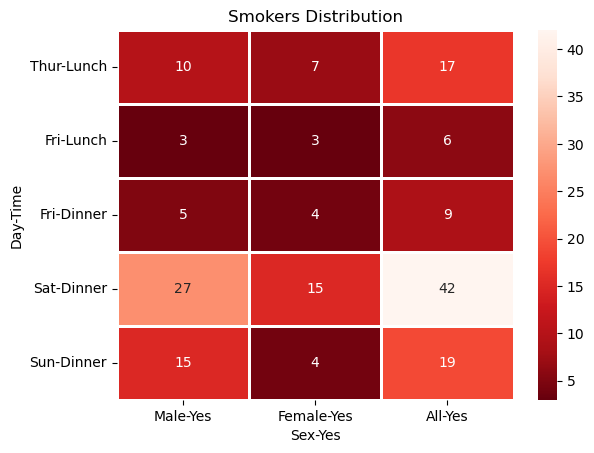

In [125]:
sns.heatmap(smokers_active.T,annot=True,cmap='Reds_r',linewidth=1,linecolor='white')
plt.xlabel('Sex-Yes')
plt.ylabel('Day-Time')
plt.title('Smokers Distribution')
plt.show()

## Vectorized Sting Functions

<br>
.str # string accessor ---> allows us to perfrom func on each element
<br>
Series.str.<strfunction>()<br>
Series.str.split(",").str.get(index).str.strip().str.split(' ',n=1,expand=True) --> expand = True output will be a DataFrame<br>

df[['col1','col2']] = new DataFrame<br>

Series.str.split(',').sum() --> add all the lists<br>

.str.replace('old','new')<br>

.str.contains('john',case=False,na=False) --> for regex<br>
.str.replace() ---> for regex --> r''<br>
.str[]----> silicing<br>
<br>
NLP<br>
------<br>
Data Gathering<br>
Data Cleaning<br>
	- lowercasing<br>
	- removing trailing and leading spaces<br>
	- removing html tags<br>
	- removing url<br>
	- expanding abbreviations<br>
	- spelling correction<br>
			- from textblob import TextBlob<br>
					TextBlob(text).correct().string<br>
	- removing puncuations<br>
			- import string<br>
				string.punctuation<br>
	- remove special characters<br>
<br>
Data Preprocessing (nltk, spacey) (setting data up for ML, not cleaning but refining/polishing<br>
	 the data machine understandable format)<br>
	- Tokenization<br>
			- from nltk.tokenize import work_tokenize<br>
	- Stopword removal<br>
			- from nltk.corpus import stopwords<br>
				stopwords.words('english')<br>
	- stemming<br>
<br>
EDA<br>
 - distribution of text length/ word count<br>
 - common unigrams/bigrams/trigrams<br>
 - wordcloud<br>
<br>
Make Features<br>
Vectorization ---> words to numbers<br>
	- BOW<br>
	- TFIDF<br>
	- Word2Vec<br>
<br>
Additionals<br>
 - PCA<br>
 - POS tagging<br>
<br>
modelling<br>
evaluation<br>
deploy<br>
monitor<br>




## Data and Time

https://www.youtube.com/watch?v=UFuo7EHI8zc&list=PL-osiE80TeTsWmV9i9c58mdDCSskIFdDS&index=10<br>
pandas Timestamp object is much faster and supports vectorization<br>
<br>
Timestamp Object - represent particular moments in time<
<br>
pd.Timestamp('YYYY/M/D')<br>
pd.Timestamp('YYYY-M-D')<br>
pd.Timestamp('YYYY,M,D')<br>
pd.Timestamp('21st September 2023')<br>
pd.Timestamp('5th Janiary 2023 9:21AM')<br>
<br>
<br>
datetime Object ---> python<br>
<br>
import datetime as dt<br>
<br>
x = pd.Timestamp(dt.datetime())<br>
x.year<br>
 .month<br>
 .day<br>
 .hour<br>
 .minute<br>
 .second<br>
 <br>
 <br>
import numpy as np<br>
date = np.array('2015-07-04', dtype=np.datetime64)<br>
data + np.arange(12)<br>
<br>
Pandas Timestamp object combines the ease-of-use of python datetime with
the efficient storage and vectorized interface of numpy.datetime64
<br>
From a group of these Timestamp objects, Pandas can construct a DatetimeIndex
that can be used to index in a Series or DataFrame.
<br>
<br>
DatatimeIndex - a collection of pandas timestamp
<br>
pd.DatetimeIndex(['2023/1/1','2023/1/2','2023/1/3']) --> from strings
<br>
pd.DatetimeIndex([dt.datetime(),dt.datetime(),dt.datetime()]) --> using python datetime
<br>
dt_index = pd.DatetimeIndex([pd.Timestamp(),pd.Timestamp(),pd.Timestamp()])
<br>
pd.Series([1,2,3], index=dt_index) --> using DatetimeIndex as series index
<br>
<br>
<br>
date_range function
<br>
pd.date_range(start='2023/1/5', end='2023/2/28', freq='D') 
<br>
freq='<n>D'/'B'/'W'/'W-THU'/'H'/'<n>H'/'M'/'MS'/'A'/'AS' can use Timedelta also but Timedelta doesn't take years as input there are limitations
<br>
<br>
pd.date_range(start='2023/1/5', periods=23, freq='D') 
<br>
<br>
to_datetime function - converts existing objects to pandas timestamp/datetimeindex object
<br>
pd.to_datetime(Series of dates as strings,errors='coerce').dt.day_name()
<br>
.dt.day_name() ---> date time accessor<br>
	 .month_name()<br>
	 .year<br>
<br>
<br>
<br>
Timedelta Object - represents a duration, the difference b/w two dates or times
<br>
t2 - t1 where t1 and t2 are Timestamp objects
<br>
pd.Timedelta(days=,hours=,minutes=) ---> can use this for arithmetic on existing timestamps
<br>
<br>
Time series
<br>
A time series is a data set that tracks a sample over time.<br>
In particular, a time series allows one to see what factors influence certain<br>
variables from period to period. Time series analysis can be useful to see how<br>
a given asset, security, or economic, variable changes over time.<br>
<br>
df.loc['2022-08-12']<br>
df.loc['2022']<br>
df.loc['2022-08-12':'2022-12-12':2]<br>
df.index.month_name()<br>
df.index.quarter<br>
<br>
pd.date_range(start= , end= , freq=pd.DateOffset(years=1))
<br>
df.index<br>
df.asfreq('D',method='ffill'/'bfill')<br>
df['col'].ffill()/.bfill()<br>
<br>
<br>
<br>
Resampling - involves changing the frequency of your time series observations<br>
	- upsampling		e.g. df['col'].resample('H').interpolate(method='linear')<br>
	- downsampling e.g. df['col'].resample('W'/'M').mean().plot()<br>
	<br>
	if data if very noisy, to get a clearer picture we can use resampling
<br>
<br>
Rolling Window (smoothing) - time series data in original format<br>
														 can be quite volatile, espicially on samller<br>
														 aggeration levels. The concept of rolling, or moving<br>
														 averages is a useful technique for smoothing time series <br>
														 data.<br>
														 
e.g. df['col'].rolling(value).mean()